<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

## 1 Comparing the two ‘dialects’

In [2]:
from matplotlib import pyplot as plt

### 1.1 Some nomenclature

We need to distinguish between a matplotlib **figure** and an **axis**

A figure is the full canvas you use to draw stuff on. An axis is the individual mathematical axes we use for plotting.

One figure can have multple axes, as shown below, where we have a single figure with four axes

![](https://sps.nus.edu.sg/sp2273/__imgs__/plotting_good_exercise-01_solution.png)

Last chapter we used twinx(), which is an example of multiple axes. Concept of axes is a little confusing at first but willl become clearer later!

### 1.2 We need some data.

In [4]:
#generate data to plot
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### 1.3 Here comes the comparison

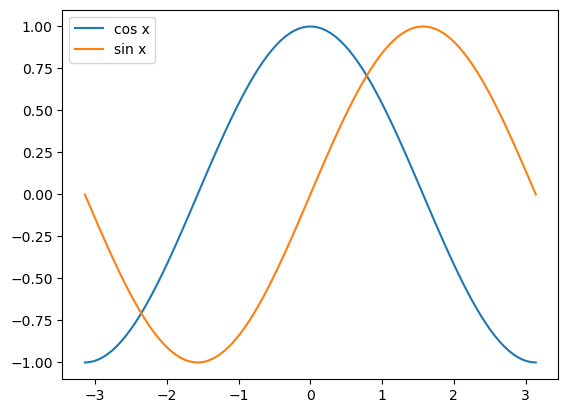

In [5]:
#pyplot interface
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()
plt.show()

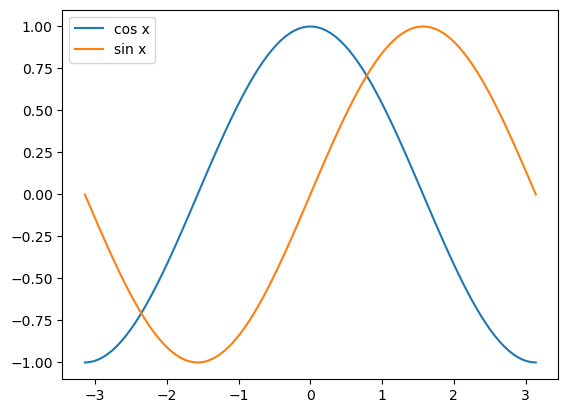

In [9]:
#using OO interface
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()
plt.show()

Both sets of code produce the same plot. For the OO interface, start by using subplots() to ask matplotlib to create a figure and an axis. matplotlib obliges and gives us a figure (fig) and an axis(ax)

## 2 Using the OO Interface

### 2.1 Getting ax

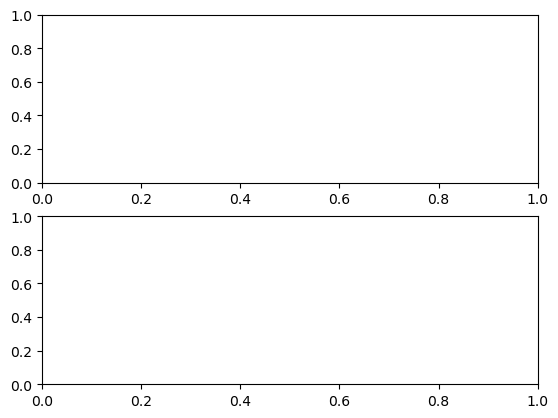

In [10]:
#To split the plots into two separate panes (with two axes) arranged as a column:

#ask for two rows (nrows=2) and one column (ncols=1)
fig, ax = plt.subplots(ncols=1, nrows=2)

### 2.2 What is ax

In [11]:
#What is ax?
type(ax)
#ax is a NumPy array

numpy.ndarray

In [12]:
#What size is ax?
ax.shape
#ax has two 'things'

(2,)

In [13]:
#What is contained in ax?
type(ax[0])
#It's a matplotlib axis

matplotlib.axes._subplots.AxesSubplot

### 2.3 Plots in a column

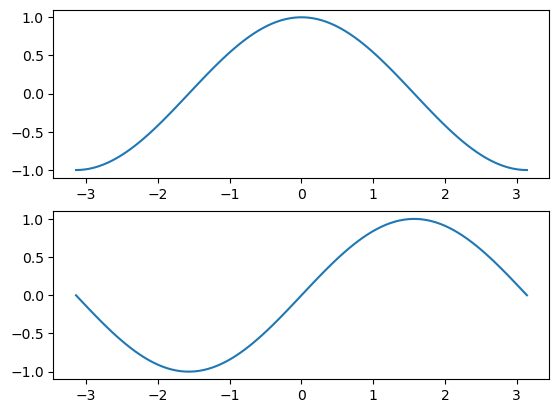

In [18]:
#Use axes to plot data
fig, ax = plt.subplots(ncols=1, nrows=2)

#First plot
ax[0].plot(x, cos_x, label = 'cos x')

#Second plot
ax[1].plot(x, sin_x, label='sin x')

### 2.4 Legends

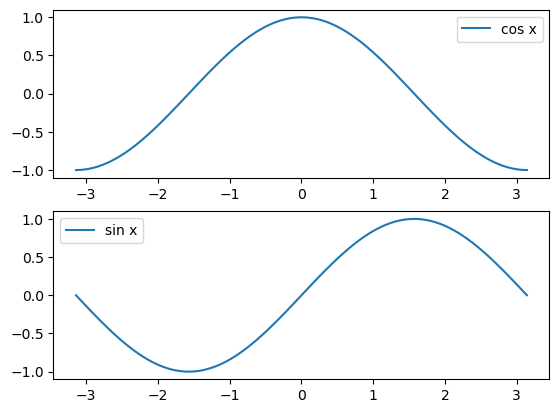

In [19]:
#To show legend, have to call for each axis

#Use axes to plot data
fig, ax = plt.subplots(ncols=1, nrows=2)

#First plot
ax[0].plot(x, cos_x, label = 'cos x')
ax[0].legend()

#Second plot
ax[1].plot(x, sin_x, label='sin x')
ax[1].legend()

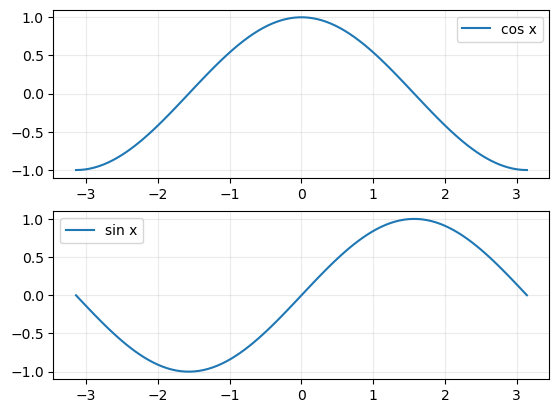

In [22]:
#Use axes to plot data
fig, ax = plt.subplots(ncols=1, nrows=2)

#First plot
ax[0].plot(x, cos_x, label = 'cos x')


#Second plot
ax[1].plot(x, sin_x, label='sin x')

#A better way is to do this with a for loop that iterates through the items in ax:
for a in ax:
    a.legend()
    a.grid(alpha=.25) #to also add grid to each axes
    

### 2.5 Tweaks

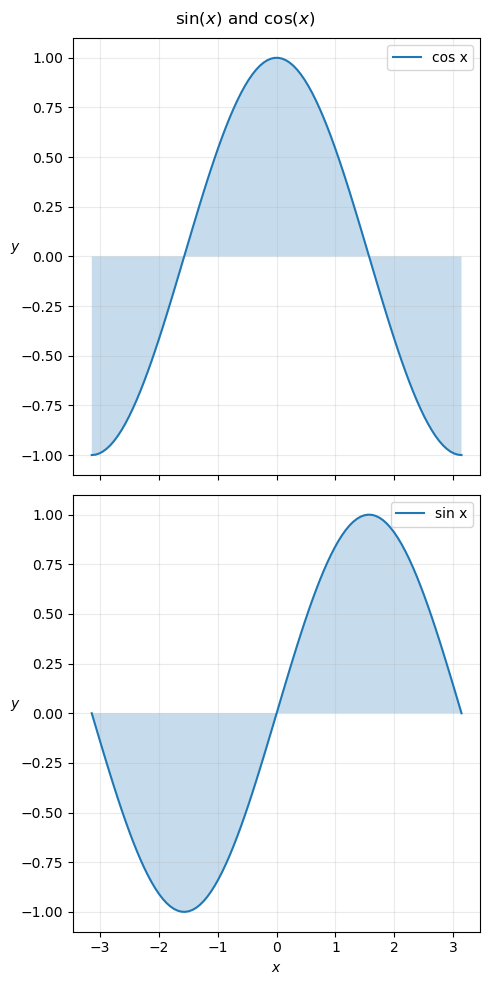

In [29]:
#Tweak a few details of the plots

#Change size of plot by specifying a figure size (figsize)
#Ask the plots to share the x-axis using sharex
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 10),   # 10 x 5 inches!
                       sharex=True)
#First plot
ax[0].plot(x, cos_x, label = 'cos x')

#Second plot
ax[1].plot(x, sin_x, label='sin x')

#A better way is to do this with a for loop that iterates through the items in ax:
for a in ax:
    a.legend()
    a.grid(alpha=.25) #to also add grid to each axes
    a.set_ylabel('$y$', rotation=0)
    
#add a x label
ax[1].set_xlabel('$x$') #have to use set_xlabel() with OO interface and not xlabel()

#fill our plot between 0 and the repsective plot values
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].fill_between(x, 0, sin_x, alpha=.25)

#add a super title to the figure
fig.suptitle(r'$\sin(x)$ and $\cos(x)$')

#ask matplotlib to make any necessary adjustments to layout to mkae plot look nice by calling tight_layout()
fig.tight_layout()

## 3 More rows and columns

![](https://sps.nus.edu.sg/sp2273/__imgs__/plotting_good_multiple_main.png)
To work with a grid of axes like that shown above.

There are two sets of $x$ values, and you can use np.ones_like() to generate an array of 1's that has the same length as the x array

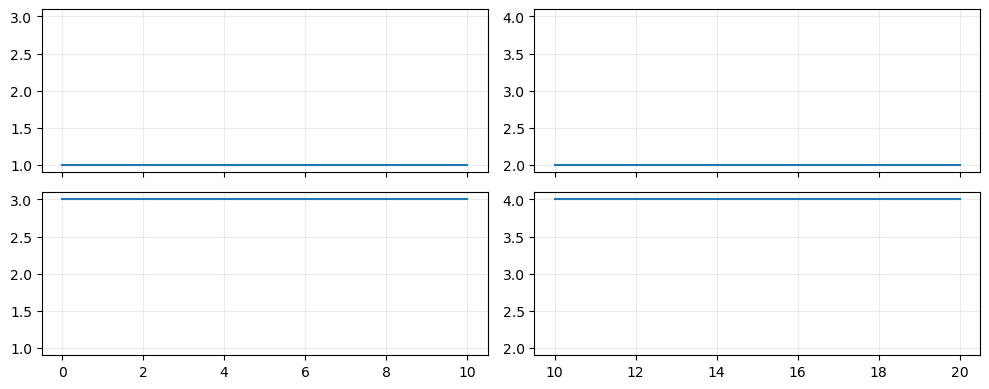

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# x data for plotting
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

top_left.plot(x1, np.ones_like(x1))
top_right.plot(x2, 2*np.ones_like(x2))
bottom_left.plot(x1, 3*np.ones_like(x1))
bottom_right.plot(x2, 4**np.ones_like(x2))

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()
plt.show()

### 3.1 Using ax

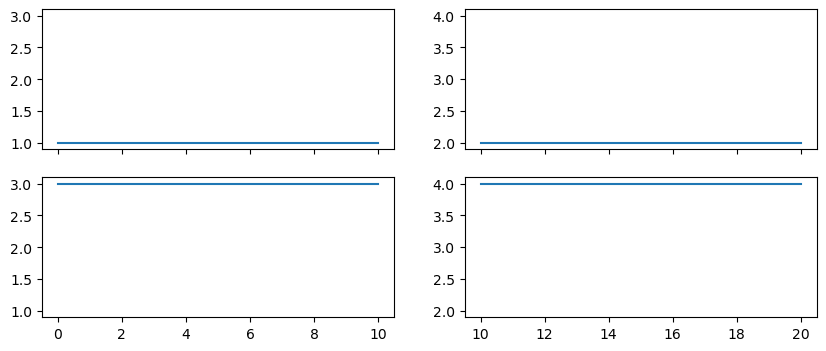

In [34]:
#Need to understand how to access ax
#there must be four axes but how is ax structured
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4),
                       sharex='col', sharey='col')

# x data for plotting
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

ax.shape #(2,2) it is a 2x2 array

#I can access each of the axes as follows:
ax[0, 0].plot(x1, np.ones_like(x1))
ax[0, 1].plot(x2, 2*np.ones_like(x2))
ax[1, 0].plot(x1, 3*np.ones_like(x1))
ax[1, 1].plot(x2, 4**np.ones_like(x2))


In [ ]:
#However, when you have to tweak each of the axes separately, it is easier to use a familiar vairable
#Can do this by:
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

#Can aso use:
top_left, top_right, bottom_left, bottom_right = ax.flatten()

#flatten() takes the 2D array and flattens it into a 1D array; unpacking takes care of the assignments

### 3.2 Sharing axes

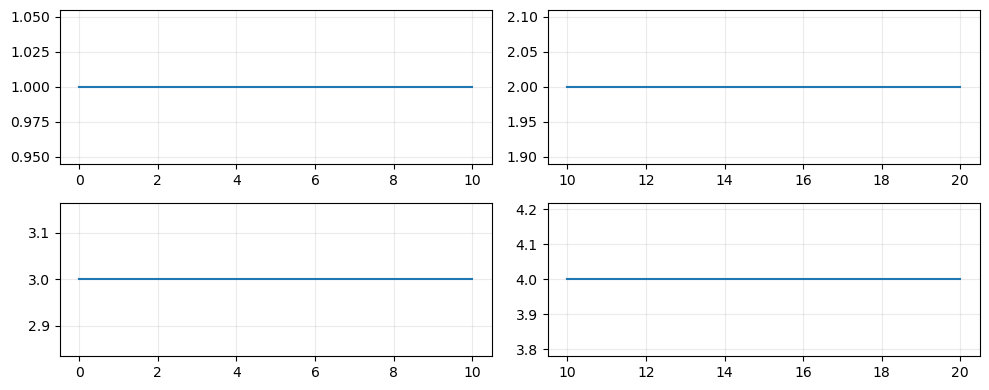

In [35]:
#can ask matplotlib to make the plots more compact by sharing the x and y axes using sharex or sharey

#if never specify how to share

fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4))

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# x data for plotting
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

top_left.plot(x1, np.ones_like(x1))
top_right.plot(x2, 2*np.ones_like(x2))
bottom_left.plot(x1, 3*np.ones_like(x1))
bottom_right.plot(x2, 4**np.ones_like(x2))

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()
plt.show()


The plots look as above because matplotlib auto scales both axes.

There are three ways to specify how to share the axes:

| **Option** | **Result**                                |
|:----------:|-------------------------------------------|
|    True    | Makes **all** the axes use the same range |
|     col    | Use the same range for all the columns    |
|     row    | Use the same range for all the rows       |

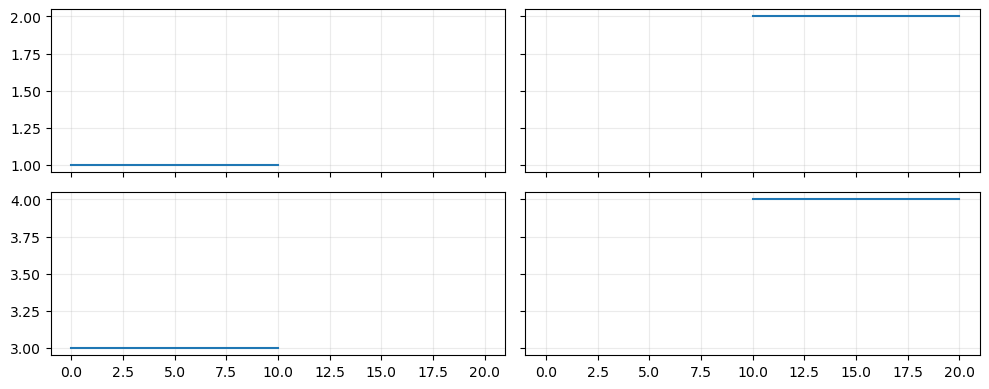

In [36]:
#using sharex=True will yield
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4),
                       sharex=True, sharey='row')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# x data for plotting
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

top_left.plot(x1, np.ones_like(x1))
top_right.plot(x2, 2*np.ones_like(x2))
bottom_left.plot(x1, 3*np.ones_like(x1))
bottom_right.plot(x2, 4**np.ones_like(x2))

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()
plt.show()

However, sharex='col' is more suited for the data we are plotting so that is used instead.

The most correct option is the on that highlights the story you are trying to convey with your plot.

### 3.3 Accessing all axes

In [ ]:
#often want to apply changes to all axes, like in the case of the grid
#one way to do this is by:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

#but the above is inefficient and it is much nicer to use a for loop:
for a in ax.flatten():
    a.grid(alpha=.25)


## 4 Other useful plots

### 4.1 Histograms

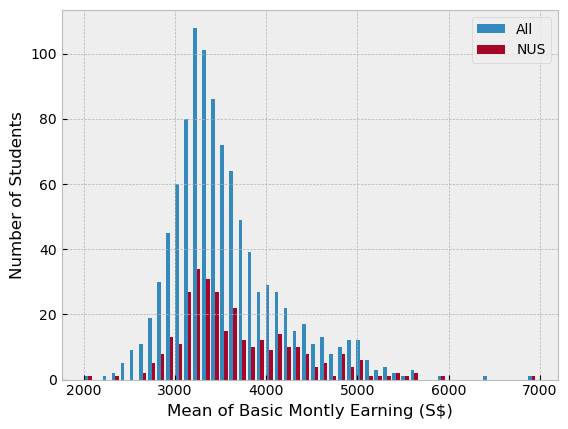

In [38]:
#histogram is good for showing distributioins of data
#here is an example of how to plot a histogram using actual data from sg.gov related to the mean monthly earnings of graduates from various universities in Singapore

data = {}

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
data['All'] = np.loadtxt(filename, skiprows=1)

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
data['NUS'] = np.loadtxt(filename, skiprows=1)

plt.style.use('bmh')

plt.hist([data['All'], data['NUS']],
         bins=50,                        # How many bins to split the data
         label=['All', 'NUS']
         )
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()
plt.show()


### 4.2 Scatter plots

/var/folders/tm/l4l9jvgj3hg7wdl__1n2t7gm0000gn/T/ipykernel_54934/829253183.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


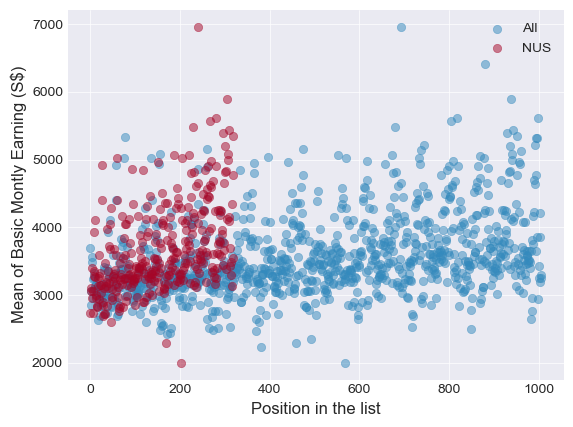

In [39]:
#Scatter plots are created by putting a marker at an (x, y) point you specify 

#Will use the same data as the previous example
#But need some values for x so will use range() along with len() to generate a list [0,, 1, 2...] appropriate to dataset

data = {}
for label in ['All', 'NUS']:
    filename = f'sg-gov-graduate-employment-survey_basic_monthly_mean_{label.lower()}.csv'
    data[label] = np.loadtxt(filename, skiprows=1)

plt.style.use('seaborn-darkgrid')

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Earning (S$)')
plt.legend()
plt.show()

### 4.3 Bar charts

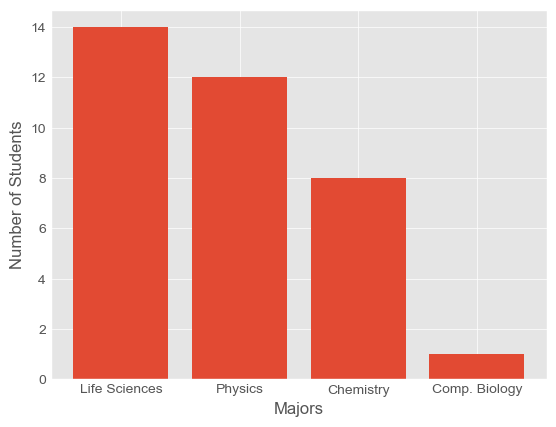

In [40]:
#Will use dummy data for a hypothetical class for this example.
#Will extract the data and typecast to pass two lists to bar()
#Use barh() for horizontal bars

student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

plt.show()


### 4.4 Pie charts

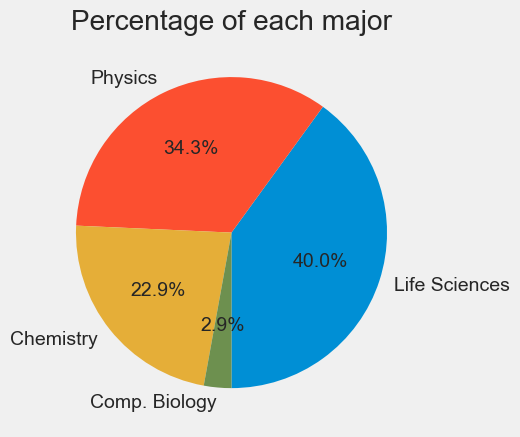

In [42]:
#To plot pie charts from the previous dummy class data 

student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')
plt.show()


## Exercise 1 :  Plotting data from files

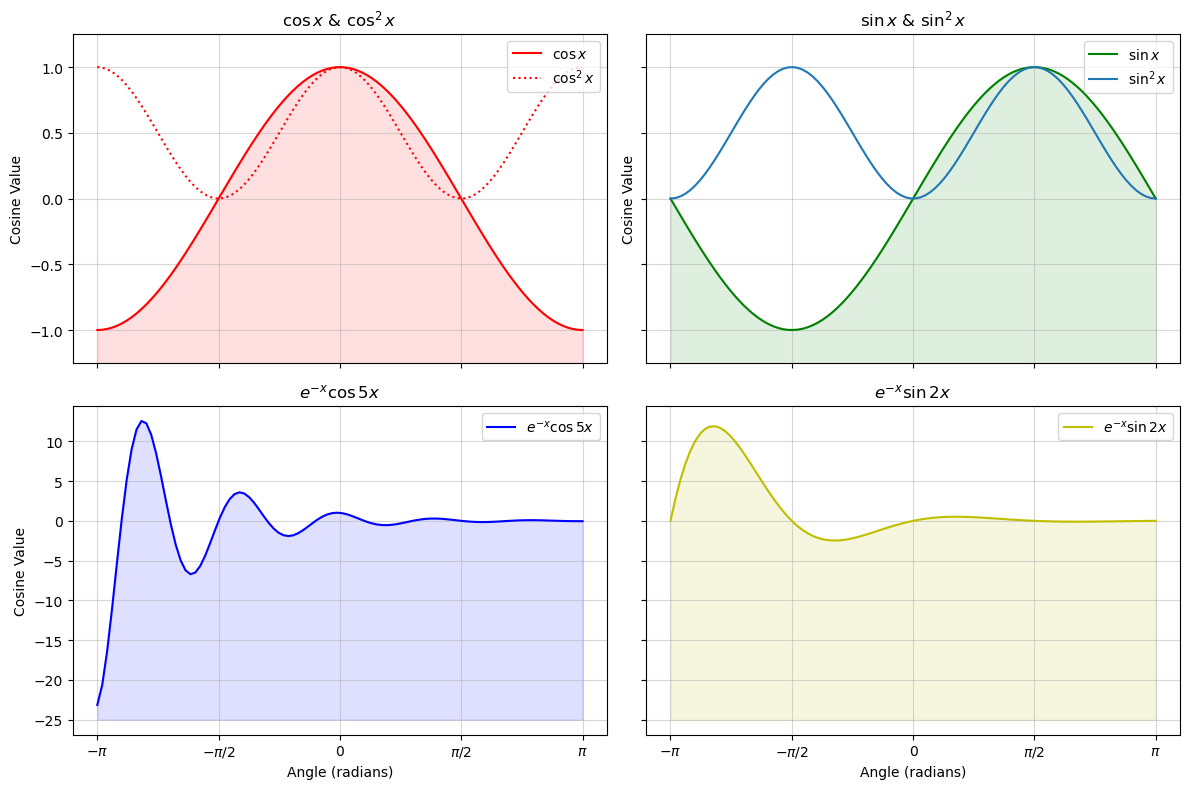

In [60]:
plt.style.use('default')

#--------- Generate cosine and sine values --------#
x = np.linspace(-np.pi, np.pi, num=100, endpoint=True)
cos_x = np.cos(x)
sin_x = np.sin(x)
fun1_x = np.exp(-x) * np.cos(5 * x)
fun2_x = np.exp(-x) * np.sin(2 * x)

#------- Plot the data -------#
fig, axes = plt.subplots(nrows=2, ncols=2,
                         figsize=(12, 8), sharex='col', sharey='row')

#------- Subplot 1 -------#
axes[0, 0].plot(x, cos_x, color='r', label='$\cos x$')
axes[0, 0].plot(x, cos_x**2, color='r',
                linestyle=':', label='$\cos^2 x$')
axes[0, 0].set_title('$\cos x$ & $\cos^2x$')
axes[0, 0].set_ylabel('Cosine Value')
axes[0, 0].fill_between(x, cos_x, -2, color='r', alpha=.125)

#------- Subplot 2 -------#
axes[0, 1].plot(x, sin_x, color='g', label='$\sin x$')
axes[0, 1].fill_between(x, sin_x, -2, color='g', alpha=.125)
axes[0, 1].plot(x, sin_x**2, label='$\sin^2 x$')
axes[0, 1].set_title('$\sin x$ & $\sin^2x$')
axes[0, 1].set_ylabel('Cosine Value')
axes[0, 1].set_ylim(-1.25, 1.25)
axes[0, 1].legend(loc='lower right', frameon=False)


#------- Subplot 3 -------#
axes[1, 0].plot(x, fun1_x, color='b', label='$e^{-x}\cos 5x$')
axes[1, 0].fill_between(x, fun1_x, -25, color='b', alpha=.125)
axes[1, 0].set_title('$e^{-x}\cos 5x$')
axes[1, 0].set_xlabel('Angle (radians)')
axes[1, 0].set_ylabel('Cosine Value')
axes[1, 0].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 0].set_yticks([-25, -20, -15, -10, -5, 0, 5, 10])
axes[1, 0].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axes[1, 0].legend()


#------- Subplot 4 -------#
axes[1, 1].plot(x, fun2_x, color='y', label='$e^{-x}\sin 2x$')
axes[1, 1].set_title('$e^{-x}\sin 2x$')
axes[1, 1].fill_between(x, fun2_x, -25, color='y', alpha=.125)
axes[1, 1].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 1].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axes[1, 1].set_yticks([-25, -20, -15, -10, -5, 0, 5, 10])
axes[1, 1].set_xlabel('Angle (radians)')
axes[1, 1].legend()


# 'flatten', 'opens' the 2D array into a simple 1D array
for a in axes.flatten():
    a.grid(alpha=.5)
    a.legend(loc='upper right')

plt.tight_layout()
plt.show()